## K-Means Clustering

Algoritmo de Clusterización basado en agrupar los datos según la menor distancia al centro del clúster. 

1. El algoritmo inicia proponiendo centros arbitrarios en la data (*a priori*).
2. Se asigna cada dato según la mínima distancia del centroide: 

$argmin_{c_i \in C} dist(c_i,x)^2$ 

3. Se recuerda al buen Zenon de Elea y se recalcula los centros de cluster según la media de todos los puntos asignados en el paso 2. 

$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i}x_i$

4. Repetición de pasos 2 y 3 hasta: 

* No existe cambios en los grupos asignados
* La suma de las distancias es la mínima
* Se alcanza el límite de iteraciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist
%matplotlib inline

In [4]:
import os
dataset = pd.read_csv(os.path.join(os.getcwd(), 'Mall_Customers.csv'))
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Cambiamos Female = 1, Male = 2

In [5]:
dataset['Gender'].replace({"Male":2, "Female": 1}, inplace=True)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [9]:
x = dataset[dataset.columns[1:]].to_numpy()
x

array([[  2,  19,  15,  39],
       [  2,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  2,  64,  19,   3],
       [  1,  30,  19,  72],
       [  2,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  2,  37,  20,  13],
       [  2,  22,  20,  79],
       [  1,  35,  21,  35],
       [  2,  20,  21,  66],
       [  2,  52,  23,  29],
       [  1,  35,  23,  98],
       [  2,  35,  24,  35],
       [  2,  25,  24,  73],
       [  1,  46,  25,   5],
       [  2,  31,  25,  73],
       [  1,  54,  28,  14],
       [  2,  29,  28,  82],
       [  1,  45,  28,  32],
       [  2,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  2,  60,  30,   4],
       [  1,  21,  30,  73],
       [  2,  53,  33,   4],
       [  2,  18,  33,  92],
       [  1,  

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[ 1.52631579, 40.39473684, 87.        , 18.63157895],
       [ 1.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 1.40650407, 40.32520325, 44.15447154, 49.82926829]])

Verificando con el método del Codo

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmodel_i = KMeans(n_clusters=k).fit(x)
    kmodel_i.fit(x)
    distortions.append(sum(np.min(cdist(x, kmodel_i.cluster_centers_, 'euclidean'), axis=1))/x.shape[0])
    

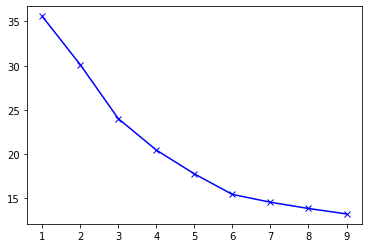

In [14]:
plt.plot(K, distortions, 'bx-')